In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
email_df = pd.read_csv('email_table.csv')
email_df.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [4]:
email_open_df = pd.read_csv('email_opened_table.csv')
email_open_df.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [5]:
link_click_df = pd.read_csv('link_clicked_table.csv')
link_click_df.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


### check the three df

In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [8]:
email_open_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
email_id    10345 non-null int64
dtypes: int64(1)
memory usage: 80.9 KB


In [9]:
link_click_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
email_id    2119 non-null int64
dtypes: int64(1)
memory usage: 16.7 KB


### check missing data for email_df

In [10]:
email_df.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

### check uniqueness of three table

In [13]:
print("email table has %i unique emails"%email_df['email_id'].nunique())
print("email open table has %i unique emails"%email_open_df['email_id'].nunique())
print("link click table has %i unique emails"%link_click_df['email_id'].nunique())

email table has 100000 unique emails
email open table has 10345 unique emails
link click table has 2119 unique emails


### merge three tables

In [15]:
email_open_df['opened'] = 1
link_click_df['clicked'] = 1

temp = pd.merge(left=email_df,right=email_open_df,how='left',on='email_id')
temp = pd.merge(left=temp,right = link_click_df,how = 'left',on='email_id')
temp

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,NaN,NaN
99996,899722,long_email,personalized,7,Saturday,US,1,NaN,NaN
99997,449610,long_email,personalized,11,Saturday,UK,6,NaN,NaN
99998,72497,short_email,generic,10,Monday,UK,0,NaN,NaN


### Q1 open_email_conversion and link_click_conversion

In [28]:
open_email_conv_rate = len(temp.dropna(subset=['opened']))/(temp['email_id'].nunique())
link_click_conv_rate = len(temp.dropna(subset=['clicked']))/(temp['email_id'].nunique())

conv_map = {'action':['open_email','link_click'],"Conversion_rate":[open_email_conv_rate,link_click_conv_rate]}
conv_df = pd.DataFrame(conv_map,columns=['action','Conversion_rate'])
conv_df

,action,Conversion_rate
0,open_email,0.10345
1,link_click,0.02119


10.3% user open emails and 2.1% user click on the link

### Q2 build model to optimize the click rate

In [30]:
temp.fillna(value=0,inplace=True)
temp['opened'] = temp['opened'].astype(int)
temp['clicked'] = temp['clicked'].astype(int)
temp

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0
...,...,...,...,...,...,...,...,...,...
99995,803504,short_email,personalized,4,Monday,US,5,0,0
99996,899722,long_email,personalized,7,Saturday,US,1,0,0
99997,449610,long_email,personalized,11,Saturday,UK,6,0,0
99998,72497,short_email,generic,10,Monday,UK,0,0,0


In [50]:
temp.groupby('clicked')['email_id'].count()/len(temp['email_id'])

clicked
0    0.97881
1    0.02119
Name: email_id, dtype: float64

the data is highly imbalanced and it is a big issue

### visualization of email_text

Text(0.5, 1.0, 'number of email sent vs email text')

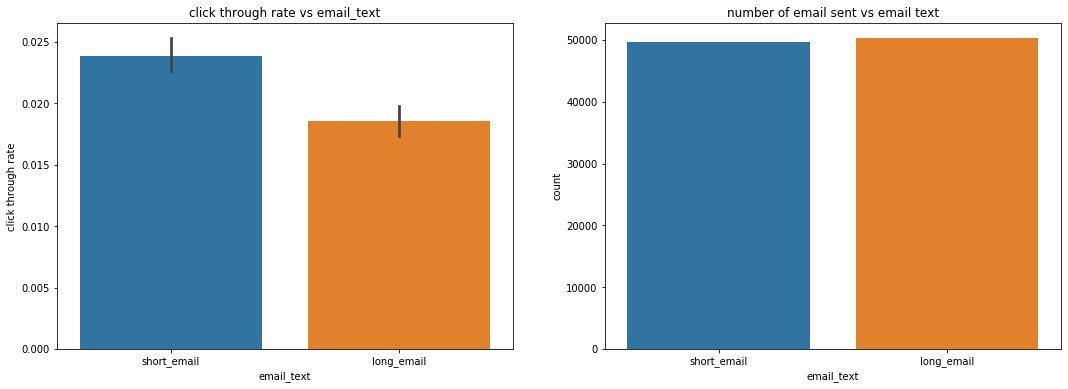

In [74]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (18,6))
sns.barplot(x='email_text',y='clicked',data=temp,ax=ax[0])
ax[0].set_title('click through rate vs email_text')
ax[0].set_ylabel('click through rate')

sns.countplot(x='email_text',data=temp,ax=ax[1])
ax[1].set_title('number of email sent vs email text')

we can see that the click through rate of short email is higher than the long email which matches our expectation

### visulization of email version

Text(0.5, 1.0, 'number of emails sent vs email version')

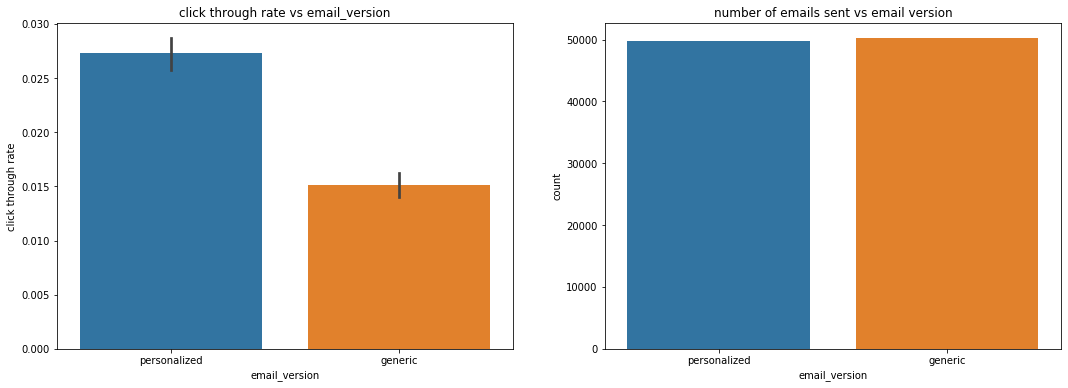

In [73]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (18,6))
sns.barplot(x='email_version',y='clicked',data=temp,ax=axes[0])
axes[0].set_title('click through rate vs email_version')
axes[0].set_ylabel('click through rate')

sns.countplot(x='email_version',data=temp,ax=axes[1])
axes[1].set_title('number of emails sent vs email version')

we can see that the personalized email has higher click through rate than generic email which matches our expectation

### visulization of hour

Text(0.5, 1.0, 'number of clicked vs hour')

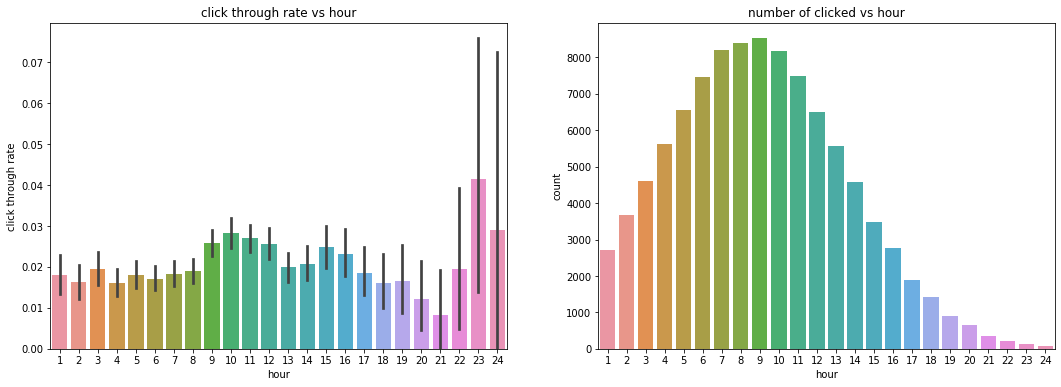

In [72]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (18,6))
sns.barplot(x='hour',y='clicked',data=temp,ax=axes[0])
axes[0].set_title('click through rate vs hour')
axes[0].set_ylabel('click through rate')

sns.countplot(x='hour',data=temp,ax=axes[1])
axes[1].set_title('number of clicked vs hour')

we can see that the email are sent the most in the morning between 7am until 10am. The highest clicked through rate occurs 11pm. 

### visualization of weekday

Text(0.5, 1.0, 'number of email sent vs weekday')

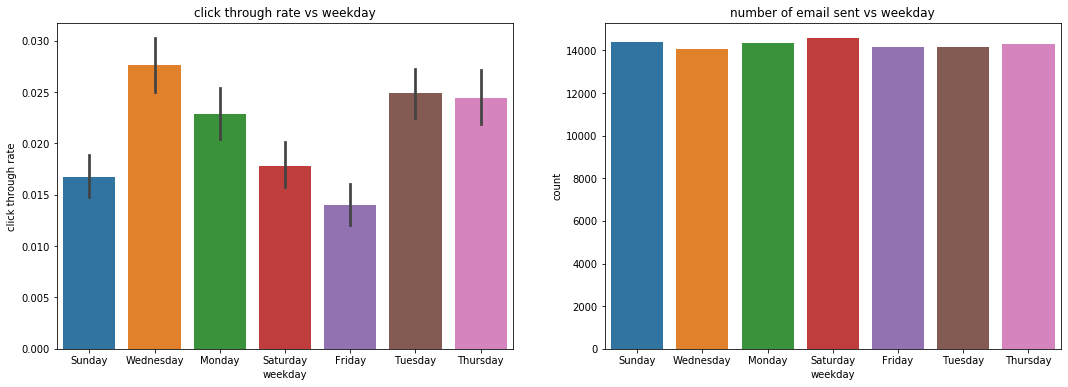

In [75]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (18,6))
sns.barplot(x='weekday',y='clicked',data=temp,ax=axes[0])
axes[0].set_title('click through rate vs weekday')
axes[0].set_ylabel('click through rate')

sns.countplot(x='weekday',data=temp,ax=axes[1])
axes[1].set_title('number of email sent vs weekday')

the highest clicked through rate occurs on wednesday, friday has the lowest click through rate

### visulization of user country

Text(0.5, 1.0, 'number of email sent vs user_country')

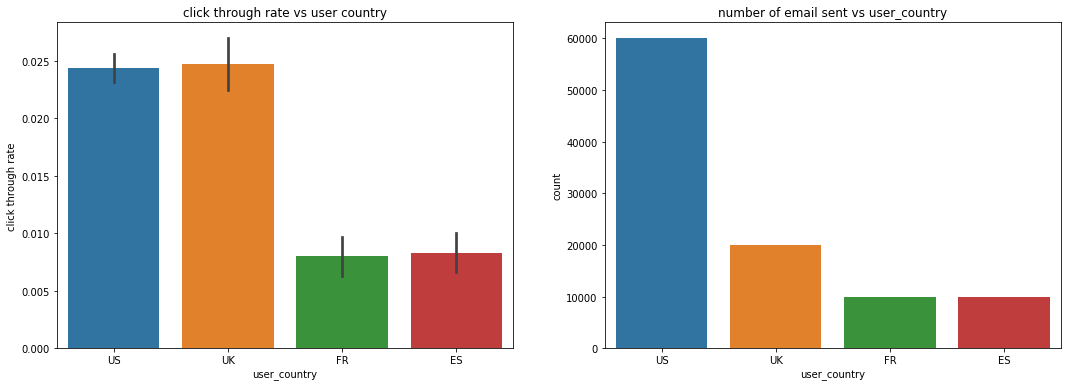

In [76]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (18,6))
sns.barplot(x='user_country',y='clicked',data=temp,ax=axes[0])
axes[0].set_title('click through rate vs user country')
axes[0].set_ylabel('click through rate')

sns.countplot(x='user_country',data=temp,ax=axes[1])
axes[1].set_title('number of email sent vs user_country')

we send most email to US users. However, UK and US both has highest clicked through rate. Perhaps we should send more marketing email to UK

### visulization of past purchase

Text(0.5, 1.0, 'number of email sent vs user past purchase')

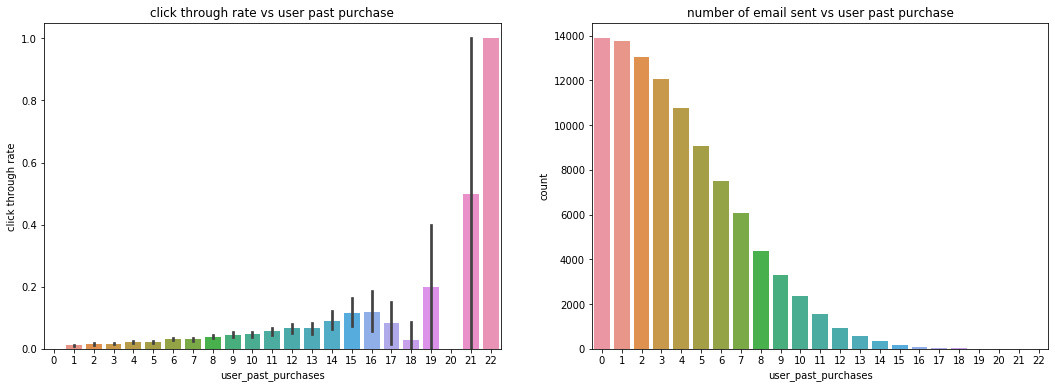

In [78]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (18,6))
sns.barplot(x='user_past_purchases',y='clicked',data=temp,ax=axes[0])
axes[0].set_title('click through rate vs user past purchase')
axes[0].set_ylabel('click through rate')

sns.countplot(x='user_past_purchases',data=temp,ax=axes[1])
axes[1].set_title('number of email sent vs user past purchase')

we send the most email to user who has 0 purchases before. However, they still has the lowest click through rate. It shows that they are lack of interest. However, if the user has already purchases over 20 items, they are highly likely to click on the link. 

### machine learning model to predict the click through probability

In [88]:
df = temp.drop(columns=['email_id','opened'])
df

,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked
0,short_email,personalized,2,Sunday,US,5,0
1,long_email,personalized,12,Sunday,UK,2,1
2,long_email,personalized,11,Wednesday,US,2,0
3,short_email,generic,6,Monday,UK,1,0
4,long_email,generic,14,Monday,US,6,0
...,...,...,...,...,...,...,...
99995,short_email,personalized,4,Monday,US,5,0
99996,long_email,personalized,7,Saturday,US,1,0
99997,long_email,personalized,11,Saturday,UK,6,0
99998,short_email,generic,10,Monday,UK,0,0


#### random forest

In [116]:
import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator
from sklearn.metrics import auc, roc_curve, classification_report

In [90]:
h2o.init()
h2o.remove_all()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,4 mins 26 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.28.1.2
H2O cluster version age:,5 months and 1 day !!!
H2O cluster name:,H2O_from_python_jinq_q2f09l
H2O cluster total nodes:,1
H2O cluster free memory:,3.278 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [109]:
h2o_df = H2OFrame(df)
h2o_df['clicked'] = h2o_df['clicked'].asfactor()
h2o_df.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%


,email_text,email_version,hour,weekday,user_country,user_past_purchases,clicked
type,enum,enum,int,enum,enum,int,enum
mins,,,1.0,,,0.0,
mean,,,9.059300000000004,,,3.878450000000028,
maxs,,,24.0,,,22.0,
sigma,,,4.439637441706966,,,3.196109783577136,
zeros,,,0,,,13877,
missing,0,0,0,0,0,0,0
0,short_email,personalized,2.0,Sunday,US,5.0,0
1,long_email,personalized,12.0,Sunday,UK,2.0,1
2,long_email,personalized,11.0,Wednesday,US,2.0,0


In [110]:
#split into 70% training and 30% testing
strat_split = h2o_df['clicked'].stratified_split(test_frac=0.3,seed=42)

train = h2o_df[strat_split=='train']
test = h2o_df[strat_split == 'test']

features = h2o_df.col_names[:-1]
target = 'clicked'
print(features)

['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']


In [136]:
#build random forest model
model = H2ORandomForestEstimator(balance_classes = True, ntrees = 100,mtries=-1,max_depth = 20, score_each_iteration=True)
model.train(x=features,y=target,training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


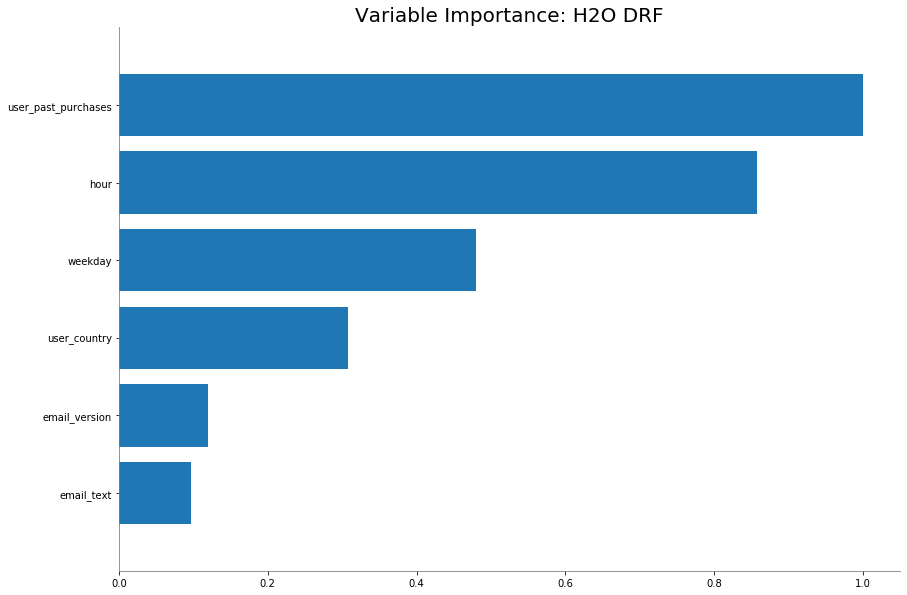

In [137]:
#variable importance
model.varimp_plot()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


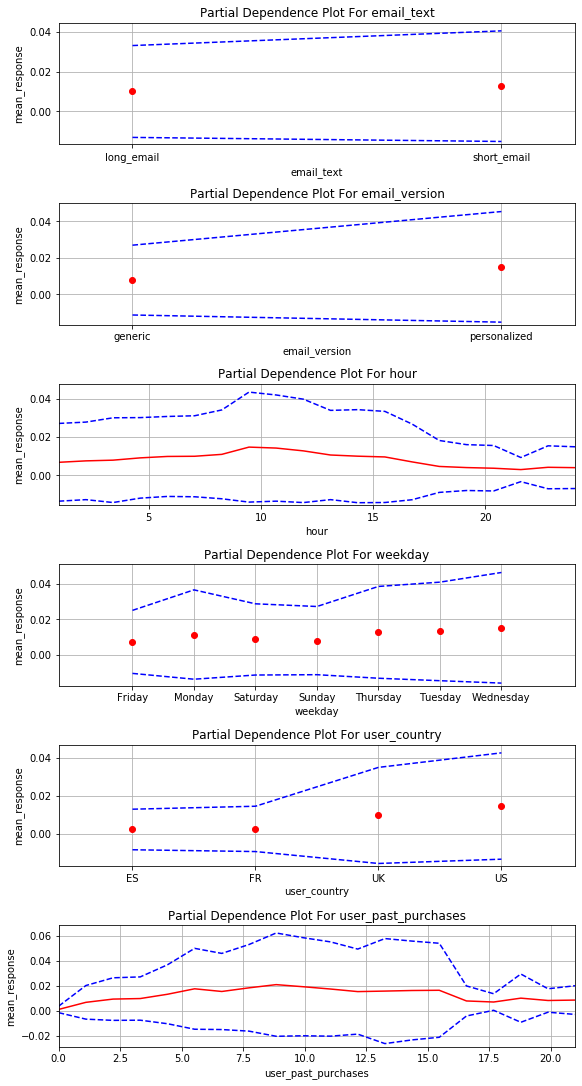

In [138]:
_ = model.partial_plot(train, cols=features, figsize=(8, 15))

In [142]:
#make prediction
train_true = train.as_data_frame()['clicked'].values
test_true = test.as_data_frame()['clicked'].values
train_predict = model.predict(train).as_data_frame()['p1'].values
test_predict = model.predict(test).as_data_frame()['p1'].values

print(train_predict.shape,train_true.shape)

train_fpr, train_tpr, _ = roc_curve(train_true,train_predict)
test_fpr, test_tpr, _ = roc_curve(test_true, test_predict)
train_auc = np.round(auc(train_fpr,train_tpr),3)
test_auc = np.round(auc(test_fpr, test_tpr),3)

drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
(70000,) (70000,)


In [147]:
# Classification report
print(classification_report(y_true=test_true, y_pred=(test_predict >0.5).astype(int)))

/Users/jinq/anaconda3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29364
           1       0.00      0.00      0.00       636

    accuracy                           0.98     30000
   macro avg       0.49      0.50      0.49     30000
weighted avg       0.96      0.98      0.97     30000



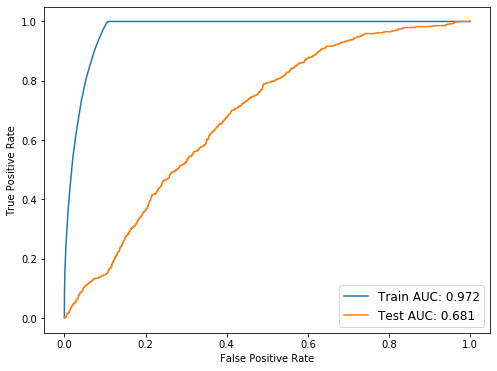

In [150]:
# ROC curves
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(fontsize=12)
plt.show()

In [ ]:
# Shutdown h2o instance
h2o.cluster().shutdown()

The model appears to be overfitting, we can perform grid search or try some other model to solve this issue.

### Q3 
By how much do you think your model would improve click through rate ( defined as # of
users who click on the link / total users who received the email). How would you test
that?

we can send email to the selected user that with higher probability to test the probability to click on the link. We can perform AB testing
* randomly assign users into two groups control and experiment
* in control group, use the old campaign strategy and send emails to all users
* in experiment group, use the model to predict wheather the user will click on the link or not, only send emails to the user with a positive prediction
* perform a one tail unpaired t test to test wheather the experiment group's click through rate is higher than the control's click through rate 

### Q4

interesting pattern on how the email campaign performed for different
segments of users?

1. we can see that the click through rate of short email is higher than the long email 
2. we can see that the personalized email has higher click through rate than generic email 
3. the highest clicked through rate occurs on wednesday, friday has the lowest click through rate
4. we can see that the email are sent the most in the morning between 7am until 10am. The highest clicked through rate occurs 11pm.
5. we send most email to US users. However, UK and US both has highest clicked through rate. Perhaps we should send more marketing email to UK.
6. we send the most email to user who has 0 purchases before. However, they still has the lowest click through rate. It shows that they are lack of interest. However, if the user has already purchases over 20 items, they are highly likely to click on the link.